Step 1: Introduction to the Data Set

In [1]:
import pandas as pd

# Load the dataset from a JSON file, specifying lines=True for ldjson
df = pd.read_json('/content/fashion_products_data.ldjson', lines=True)
print("Dataset loaded")

Dataset loaded


In [2]:
# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")  # Number of rows and columns

Dataset Shape: (30000, 33)


In [3]:
# Display basic information about the dataset
print(f"Columns in Dataset: {df.columns.tolist()}")  # List of column names

Columns in Dataset: ['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'brand', 'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category', 'sales_rank_in_child_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'product_details__k_v_pairs', 'discount_percentage', 'colour', 'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock', 'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs', 'formats___editions', 'name_of_author_for_books']


In [4]:
# Display basic information about the dataset
print(f"First few rows of the dataset:\n{df.head()}")

First few rows of the dataset:
                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-..

Step 2: Data Set Details and Features

In [5]:
# List key features from the dataset that are relevant for analysis
key_features = ['uniq_id', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'seller_name', 'brand', 'weight', 'no__of_reviews']
print("\nKey Features of the Dataset:\n", df[key_features].head())



Key Features of the Dataset:
                             uniq_id  \
0  26d41bdc1495de290bc8e6062d927729   
1  410c62298852e68f34c35560f2311e5a   
2  52e31bb31680b0ec73de0d781a23cc0a   
3  25798d6dc43239c118452d1bee0fb088   
4  ad8a5a196d515ef09dfdaf082bdc37c4   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...   
3           People Men's Printed Regular fit T-Shirt   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...   

                                   image_urls__small  \
0  h

Step 3: Handling Null Values and Data Cleaning

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Drop irrelevant columns like 'seller_id' and 'weight' if they don't provide value
df_cleaned = df.drop(columns=['seller_id', 'weight'])

# Drop columns with more than 80% missing values (like technical details)
df_cleaned = df_cleaned.dropna(thresh=int(0.15 * len(df_cleaned)), axis=1)

# After dropping columns with too many missing values, drop rows with any remaining nulls
df_cleaned = df_cleaned.dropna()

# Display cleaned dataset shape
print(f"Cleaned Dataset Shape: {df_cleaned.shape}")
print(f"Columns after cleaning: {df_cleaned.columns.tolist()}")


Cleaned Dataset Shape: (1130, 24)
Columns after cleaning: ['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'brand', 'sales_price', 'rating', 'sales_rank_in_parent_category', 'sales_rank_in_child_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'product_details__k_v_pairs', 'discount_percentage', 'colour', 'seller_name']


Step 4: Exploring Data Using URLs

4.1 Exploring for image_urls__small

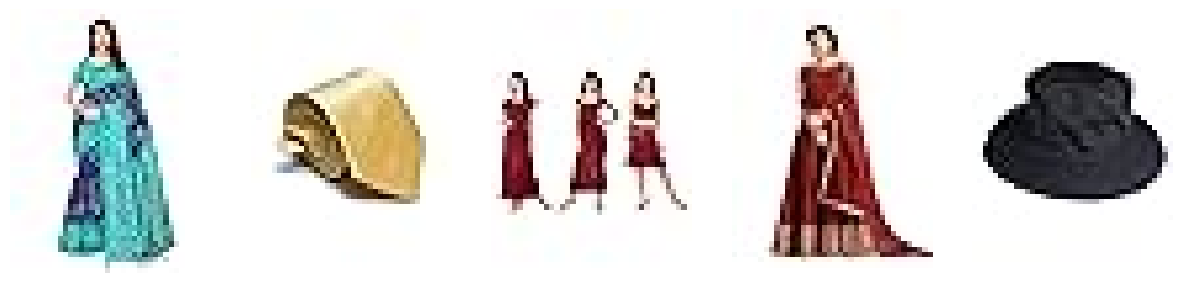

In [7]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to load and display product images using URLs
def display_images(image_urls, num_images=5):
    try:
        # Select random indices
        random_urls = image_urls.sample(n=num_images).reset_index(drop=True)

        # Create a plot with multiple subplots
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

        for i in range(num_images):
            # Get the random image URL
            image_url = random_urls.iloc[i]
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))

            # Display each image in a subplot
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for each image

        plt.show()  # Display all the images
    except Exception as e:
        print(f"Error displaying images: {e}")

# Display 5 random images from the 'large' column
display_images(df_cleaned['image_urls__small'], num_images=5)


4.2 Exploring for medium

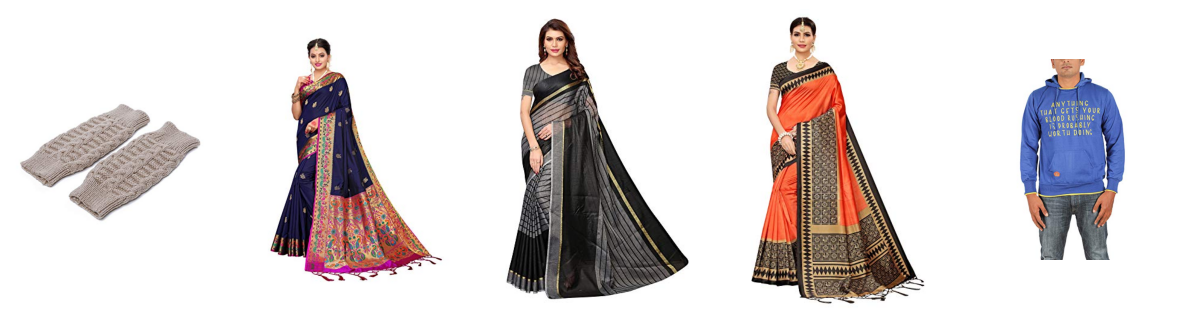

In [8]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to load and display product images using URLs
def display_images(image_urls, num_images=5):
    try:
        # Select random indices
        random_urls = image_urls.sample(n=num_images).reset_index(drop=True)

        # Create a plot with multiple subplots
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

        for i in range(num_images):
            # Get the random image URL
            image_url = random_urls.iloc[i]
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))

            # Display each image in a subplot
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for each image

        plt.show()  # Display all the images
    except Exception as e:
        print(f"Error displaying images: {e}")

# Display 5 random images from the 'large' column
display_images(df_cleaned['medium'], num_images=5)


4.3 Exploring for large

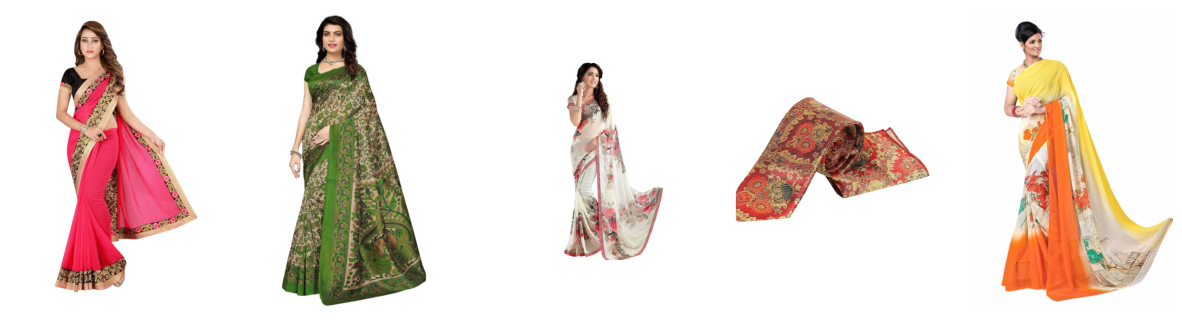

In [9]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to load and display product images using URLs
def display_images(image_urls, num_images=5):
    try:
        # Select random indices
        random_urls = image_urls.sample(n=num_images).reset_index(drop=True)

        # Create a plot with multiple subplots
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

        for i in range(num_images):
            # Get the random image URL
            image_url = random_urls.iloc[i]
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))

            # Display each image in a subplot
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for each image

        plt.show()  # Display all the images
    except Exception as e:
        print(f"Error displaying images: {e}")

# Display 5 random images from the 'large' column
display_images(df_cleaned['large'], num_images=5)


Step 5: Data Analysis and Visualization

5.1: Bar Chart for Frequency of Brands

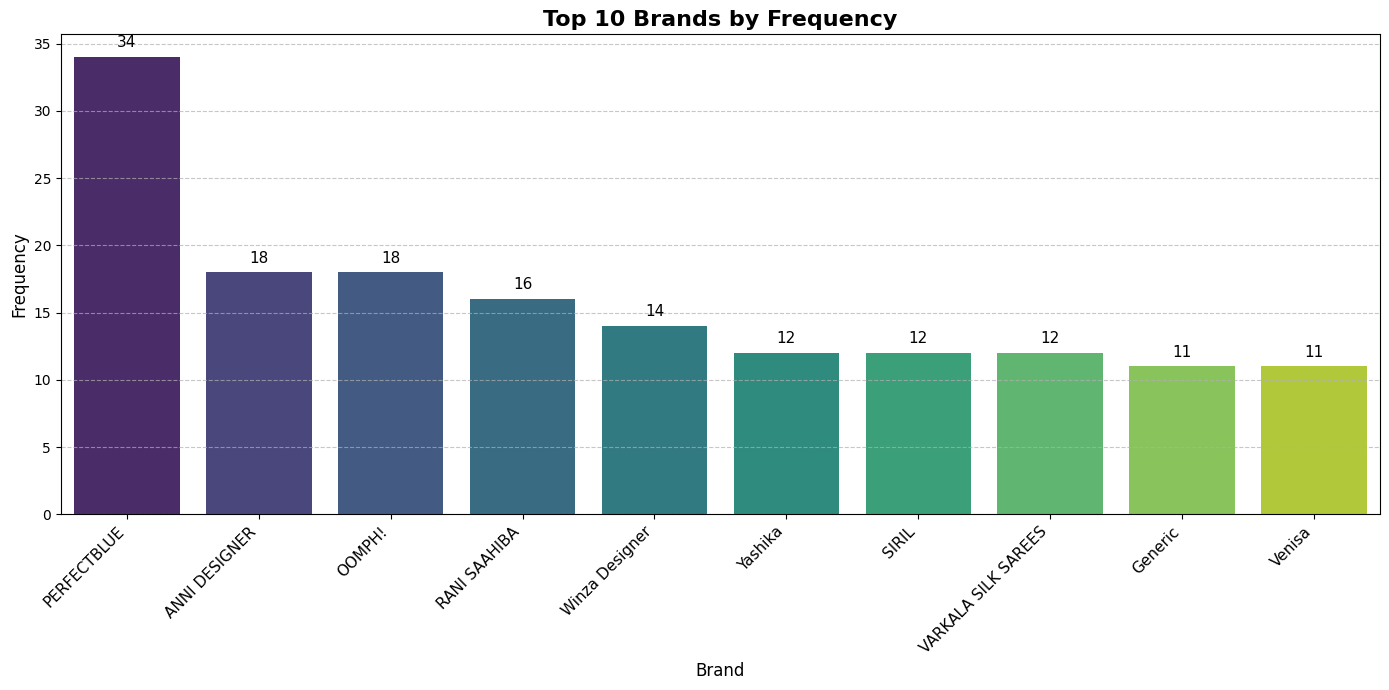

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of Top 10 Brands by Frequency
plt.figure(figsize=(14, 7))  # Increased figure size for better clarity
top_brands = df_cleaned['brand'].value_counts().nlargest(10)

# Using hue to avoid the FutureWarning
sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette='viridis', legend=False)

# Add title and labels with custom fonts
plt.title('Top 10 Brands by Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations to each bar for more clarity
for i, value in enumerate(top_brands.values):
    plt.text(i, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=11, color='black')

# Show the plot
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()


5.2: Scatter Plot for Sales Price vs. Rating

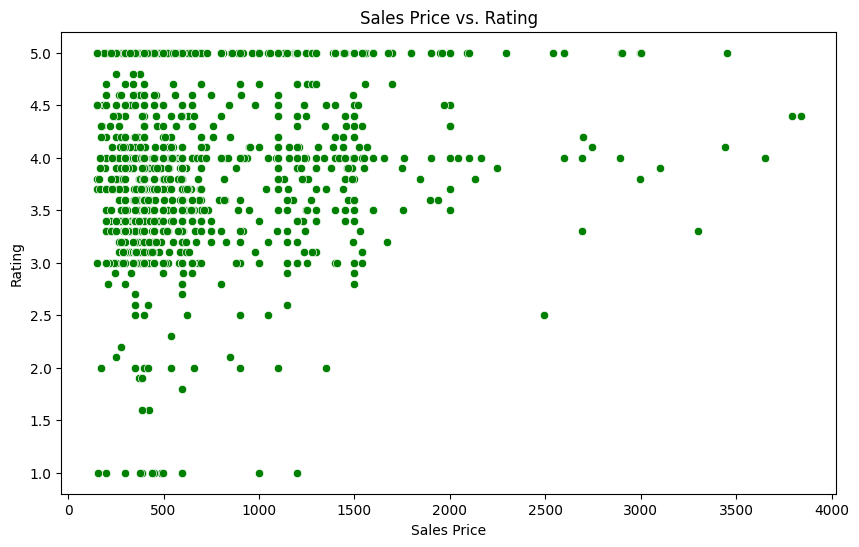

In [11]:
# Scatter Plot: Sales Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['sales_price'], y=df_cleaned['rating'], color='green')
plt.title('Sales Price vs. Rating')
plt.xlabel('Sales Price')
plt.ylabel('Rating')
plt.show()


5.3: Pie Chart for Amazon Prime Eligibility

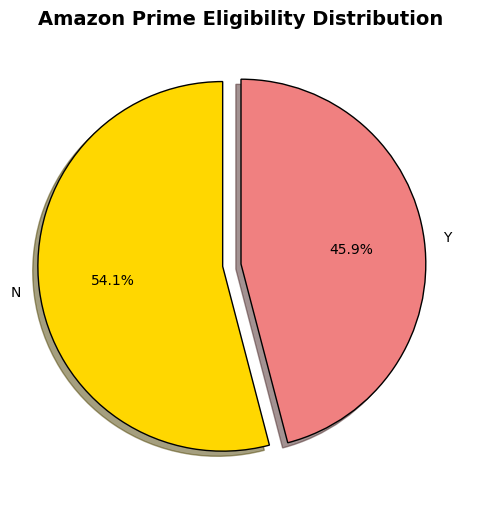

In [12]:
import matplotlib.pyplot as plt

# Pie chart for Amazon Prime Eligibility
prime_counts = df_cleaned['amazon_prime__y_or_n'].value_counts()

# Define colors for the chart
colors = ['gold', 'lightcoral']

# Explode the first slice for emphasis
explode = (0.1, 0)  # Explode the first slice slightly

# Create the pie chart
plt.figure(figsize=(6, 6))
prime_counts.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}  # Adds a black border to each slice
)

# Title and styling
plt.title('Amazon Prime Eligibility Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')  # Removes the default ylabel

# Display the chart
plt.show()


5.4: Correlation Matrix Heatmap

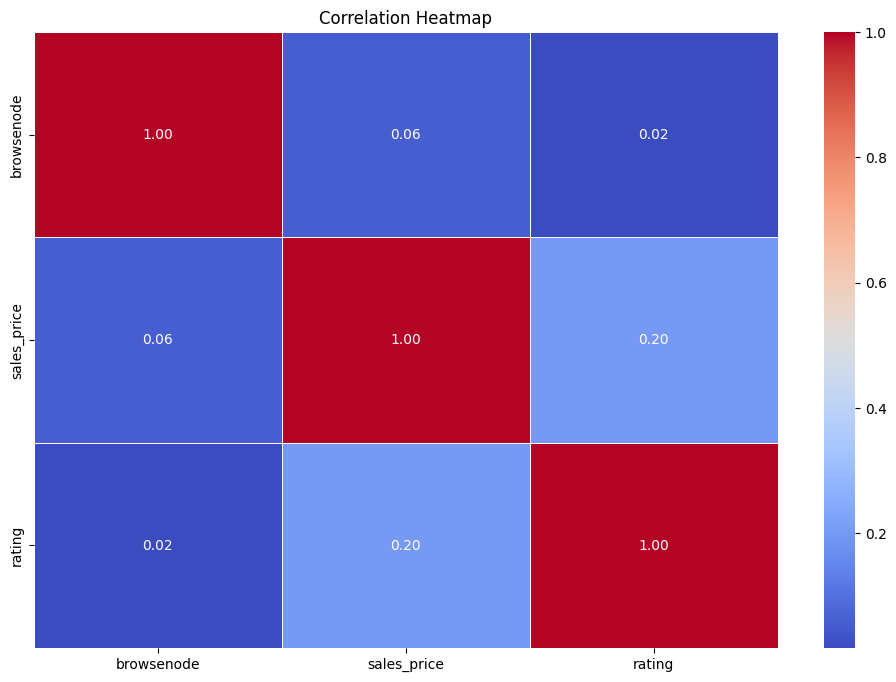

In [13]:
# Correlation Heatmap
corr_matrix = df_cleaned.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Step 6: Conclusion and Next Steps

In [14]:
# Summary of cleaning and analysis tasks
print("\nData Analysis Summary:")
print(f"- Cleaned dataset contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns.")
print(f"- Data visualizations include bar charts, scatter plots, pie charts, and a correlation heatmap.")
print(f"- We explored the brand distribution, relationship between sales price and rating, Amazon Prime eligibility, and correlations.")



Data Analysis Summary:
- Cleaned dataset contains 1130 rows and 24 columns.
- Data visualizations include bar charts, scatter plots, pie charts, and a correlation heatmap.
- We explored the brand distribution, relationship between sales price and rating, Amazon Prime eligibility, and correlations.


Step 7: Clean Product Names and Save Dataset as JSON

In [15]:
import re

def clean_product_name(name):
    return re.sub(r'[^A-Za-z0-9+\-*/=<>\s]', '', name)

df['product_name'] = df['product_name'].apply(clean_product_name)

print("Cleaned product_name sample:")
print(df['product_name'].head(15), "\n")

df.to_json("cleaned_fashion_products_data.ldjson", orient='records', lines=True)
print("Cleaned dataset saved as 'cleaned_fashion_products_data.ldjson'")

Cleaned product_name sample:
0     LA Facon Cotton Kalamkari Handblock Saree Blou...
1     Sf Jeans By Pantaloons Mens Plain Slim fit T-S...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3               People Mens Printed Regular fit T-Shirt
4     Monte Carlo Grey Solid Cotton Blend Polo Colla...
5     Forest Club  Gym Wear  Sports Shorts Shorts fo...
6     PrintOctopus Graphic Printed T-Shirt for Men C...
7        Pepe Jeans Mens Solid Regular fit Casual Shirt
8     Carahere Boys Handmade Pre-Tied Classic Polka ...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
11               Puma Unisex Tribal Regular Fit T-Shirt
12    Jevi Prints Womens Cotton Printed Straight Kur...
13    OLLI Mens Orange Lex Purple White Cotton Brief...
14    Pinkmint Womens Multi-Coloured Digital Print C...
Name: product_name, dtype: object 

Cleaned dataset saved as 'cleaned_fashion_products_data.ldjson'


Step 8:Expanding Product Name Contractions and Saving Cleaned Data

In [16]:
!pip install contractions
import contractions

def expand_contractions(name):
    return contractions.fix(name)

# Apply the function to the product_name column
df['product_name'] = df['product_name'].apply(expand_contractions)

# Display the updated product names for the first few rows
print("Updated product_name sample after expanding contractions:")
print(df['product_name'].head(15), "\n")

# Save the updated dataset if needed
df.to_json("expanded_fashion_products_data.ldjson", orient='records', lines=True)
print("Dataset with expanded contractions saved as 'expanded_fashion_products_data.ldjson'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.2 MB/s eta 0:00:00
Updated product_name sample after expanding contractions:
0     LA Facon Cotton Kalamkari Handblock Saree Blou...
1     Sf Jeans By Pantaloons Mens Plain Slim fit T-S...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3               People Mens Printed Regular fit T-Shirt
4     Monte Carlo Grey Solid Cotton Blend Polo Colla...
5     Forest Club  Gym Wear  Sports Shorts Shorts fo...
6     PrintOctopus Graphic Printed T-Shirt for Men C...
7        Pepe Jeans Mens Solid Regular fit Casual Shirt
8     Carahere Boys Handmade Pre-Tied Classic Polka ...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
11               Puma Unisex Tribal Regular Fit T-Shirt
12    Jevi Prints Womens Cotton Printed Straight Kur...
13    OLLI Mens Orange Lex Purple White Cotton Brief

Step 9:Stemming and Lemmatizing Product Names for Consistent Text Processing

In [17]:
pip install nltk


In [18]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function to apply stemming and lemmatization
def stem_and_lemmatize(name):
    tokens = word_tokenize(name)

    # Apply stemming and lemmatization to each token
    processed_tokens = []
    for token in tokens:
        stemmed_token = stemmer.stem(token)
        lemmatized_token = lemmatizer.lemmatize(stemmed_token)
        processed_tokens.append(lemmatized_token)

    # Reconstruct the product name
    return ' '.join(processed_tokens)

# Apply the function to the product_name column
df['product_name'] = df['product_name'].apply(stem_and_lemmatize)

# Display the updated product names for the first few rows
print("Updated product_name sample after stemming and lemmatization:")
print(df['product_name'].head(15), "\n")

# Save the updated dataset if needed
df.to_json("processed_fashion_products_data.ldjson", orient='records', lines=True)
print("Dataset with stemming and lemmatization saved as 'processed_fashion_products_data.ldjson'")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Updated product_name sample after stemming and lemmatization:
0     la facon cotton kalamkari handblock sare blous...
1       sf jean by pantaloon men plain slim fit t-shirt
2     lovista cotton gota patti tassel tradit print ...
3                   peopl men print regular fit t-shirt
4     mont carlo grey solid cotton blend polo collar...
5     forest club gym wear sport short short for men...
6     printoctopu graphic print t-shirt for men chil...
7          pepe jean men solid regular fit casual shirt
8     caraher boy handmad pre-ti classic polka dot b...
9                              peppermint synthet dress
10    toddler littl boy straight outta timeout long ...
11               puma unisex tribal regular fit t-shirt
12    jevi print woman cotton print straight kurta p...
13    olli men orang lex purpl white cotton brief in...
14    pinkmint woman multi-colour digit print crepe ...
Name: product_name, dtype: object 

Dataset with stemming and lemmatization saved as 'processed_fa

Vectorizing Product Names using Bag of Words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Initialize CountVectorizer
vectorizer = CountVectorizer()

# Step 2: Fit and Transform the product_name column
bow_matrix = vectorizer.fit_transform(df['product_name'])

# Step 3: Create a DataFrame from the BoW matrix
vector_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Display the shape of the vector database
print("Shape of the vector database:", vector_df.shape)

# Display a preview of the vectorized product names
print("Sample vectors:\n", vector_df.head())


Shape of the vector database: (30000, 16275)
Sample vectors:
    00  00033  0005  000570pink235  001  0013  0013orang  0017  00199boysswss  \
0   0      0     0              0    0     0          0     0              0   
1   0      0     0              0    0     0          0     0              0   
2   0      0     0              0    0     0          0     0              0   
3   0      0     0              0    0     0          0     0              0   
4   0      0     0              0    0     0          0     0              0   

   001black  ...  zoya  zoyei  ztlvrpl05black  zumba  zumka  zunahm  zupaco  \
0         0  ...     0      0               0      0      0       0       0   
1         0  ...     0      0               0      0      0       0       0   
2         0  ...     0      0               0      0      0       0       0   
3         0  ...     0      0               0      0      0       0       0   
4         0  ...     0      0               0      0      0   

Product Recommendation using Bag of Words and Pairwise Distance

Bag of Words Recommendations using Pairwise Distance:
                                            product_name  \
18915  LA Facon Cotton Kalamkari Handblock Saree Blou...   
10141  Cotton Kalamkari Handblock Saree Blouse/Kurti ...   
1390              GoSriKi Cotton with Blouse Piece Saree   
18705         PerfectBlue Cotton Saree with Blouse Piece   
26542         PerfectBlue Cotton Saree with Blouse Piece   
9316          PerfectBlue Cotton Saree with Blouse Piece   
11806         PerfectBlue Cotton Saree with Blouse Piece   
574        Being Banarasi Cotton with Blouse Piece Saree   

                                             product_url  
18915  https://www.amazon.in/Facon-Kalamkari-Handbloc...  
10141  https://www.amazon.in/Cotton-Kalamkari-Handblo...  
1390   https://www.amazon.in/Indira-Designer-Linen-Bl...  
18705  https://www.amazon.in/PerfectBlue-Womens-Blous...  
26542  https://www.amazon.in/PerfectBlue-Cotton-Saree...  
9316   https://www.amazon.in/PerfectBlue-Cotton-Sar

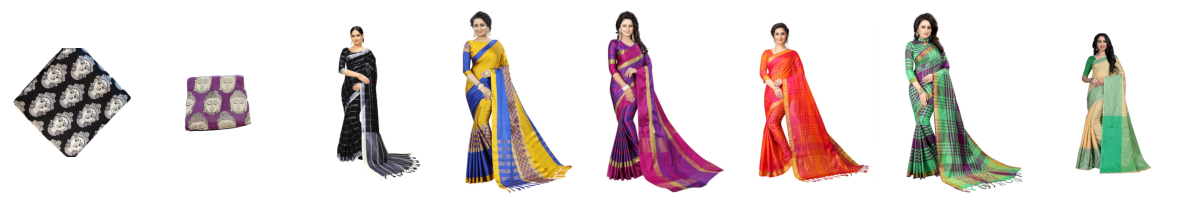

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Clean product names (removes unwanted characters)
def clean_product_name(name):
    import re
    return re.sub(r'[^A-Za-z0-9+\-*/=<>\s]', '', name)

# Load and clean the dataset
df = pd.read_json('cleaned_fashion_products_data.ldjson', lines=True)
df['product_name'] = df['product_name'].apply(clean_product_name)

# Bag of Words Vectorization
vectorizer_bow = CountVectorizer(stop_words='english')
bow_matrix = vectorizer_bow.fit_transform(df['product_name'])

# Function to recommend products based on a product's uniq_id using pairwise distance
def recommend_products_by_id(uniq_id, matrix, num_recommendations=5, metric='euclidean'):
    # Get the index of the product based on uniq_id
    if df[df['uniq_id'] == uniq_id].empty:
        print(f"Error: uniq_id '{uniq_id}' not found in the dataset.")
        return None  # Or handle the error appropriately
    else:
        product_index = df[df['uniq_id'] == uniq_id].index[0]

    # Calculate pairwise distances (e.g., Euclidean, Manhattan, etc.)
    distances = pairwise_distances(matrix[product_index], matrix, metric=metric).flatten()

    # Get indices of products with smallest distances (most similar)
    similar_indices = distances.argsort()[1:num_recommendations+1]  # Exclude the product itself
    return df.iloc[similar_indices]

# Function to display product images
def display_images(image_urls):
    try:
        fig, axes = plt.subplots(1, len(image_urls), figsize=(15, 5))
        for i, url in enumerate(image_urls):
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")

# Example product_id (replace this with a valid uniq_id from your dataset)
product_uniq_id = df['uniq_id'].iloc[0]  # Use the first uniq_id from your dataset
num_recommendations = 8

# Get recommendations for the given uniq_id using Bag of Words and pairwise distance
bow_recommendations = recommend_products_by_id(product_uniq_id, bow_matrix, num_recommendations)

if bow_recommendations is not None:  # Check if recommendations were found
    print("Bag of Words Recommendations using Pairwise Distance:")
    print(bow_recommendations[['product_name', 'product_url']])
    display_images(bow_recommendations['large'].tolist())


Recommending Products using TF-IDF and Pairwise Distance

TF-IDF Recommendations using Pairwise Distance:
                                            product_name  \
18915  LA Facon Cotton Kalamkari Handblock Saree Blou...   
10141  Cotton Kalamkari Handblock Saree Blouse/Kurti ...   
438                                                 ONLY   
19612  HANDBLOCK PRINT Womens Rayon Embroidered Anark...   
8699   Winza Designer Womens Kalamkari Art Silk Saree...   
13318  Kalamkari Print Cotton Fabric for Womens Cloth...   
14369  Black Orange Cotton Saree/Cotton Saree With Ru...   
5987   Winza Designer Kalamkari Art Silk Saree Sarees...   

                                             product_url  
18915  https://www.amazon.in/Facon-Kalamkari-Handbloc...  
10141  https://www.amazon.in/Cotton-Kalamkari-Handblo...  
438    https://www.amazon.in/ONLY-Casual-Sweater-_571...  
19612  https://www.amazon.in/HANDBLOCK-PRINT-Womens-E...  
8699   https://www.amazon.in/Winza-Designer-Saree-Blo...  
13318  https://www.amazon.in/Kalamkari-Clothes-Patial... 

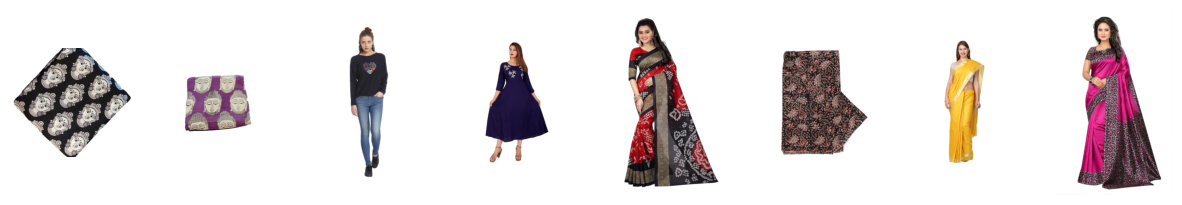

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Clean product names (removes unwanted characters)
def clean_product_name(name):
    import re
    return re.sub(r'[^A-Za-z0-9+\-*/=<>\s]', '', name)

# Load and clean the dataset
df = pd.read_json('cleaned_fashion_products_data.ldjson', lines=True)
df['product_name'] = df['product_name'].apply(clean_product_name)

# TF-IDF Vectorization
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer_tfidf.fit_transform(df['product_name'])

# Function to recommend products based on a product's uniq_id using pairwise distance
def recommend_products_by_id(uniq_id, matrix, num_recommendations=5, metric='euclidean'):
    # Get the index of the product based on uniq_id
    if df[df['uniq_id'] == uniq_id].empty:
        print(f"Error: uniq_id '{uniq_id}' not found in the dataset.")
        return None
    else:
        product_index = df[df['uniq_id'] == uniq_id].index[0]

    # Calculate pairwise distances (e.g., Euclidean, Manhattan, etc.)
    distances = pairwise_distances(matrix[product_index], matrix, metric=metric).flatten()

    # Get indices of products with smallest distances (most similar)
    similar_indices = distances.argsort()[1:num_recommendations+1]  # Exclude the product itself
    return df.iloc[similar_indices]

# Function to display product images
def display_images(image_urls):
    try:
        fig, axes = plt.subplots(1, len(image_urls), figsize=(15, 5))
        for i, url in enumerate(image_urls):
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")

# Example product_id (replace this with a valid uniq_id from your dataset)
product_uniq_id = df['uniq_id'].iloc[0]  # Gets the first available uniq_id from the dataset
num_recommendations = 8

# Get recommendations for the given uniq_id using TF-IDF and pairwise distance
tfidf_recommendations = recommend_products_by_id(product_uniq_id, tfidf_matrix, num_recommendations)

# Check if recommendations were found before printing and displaying images
if tfidf_recommendations is not None:
    print("TF-IDF Recommendations using Pairwise Distance:")
    print(tfidf_recommendations[['product_name', 'product_url']])
    display_images(tfidf_recommendations['large'].tolist())


Product Recommendations using Word2Vec and Cosine Similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec Recommendations using Cosine Similarity:
                                            product_name  \
18915  LA Facon Cotton Kalamkari Handblock Saree Blou...   
17557  Viva N Diva Off White Poly Cotton Blend Printe...   
4439   Maliqua Plain Weave Poly Cotton Printed Saree ...   
13201  Viva N Diva Light Pink Poly Cotton Blend Print...   
5152   dB DESH BIDESH Women Sakuntala Design Pure Han...   
28346  RLB Fashion Womens Cotton Silk Handloom Dhakai...   
4265   Anni Designer Womens Red White  Black Georgett...   
18793  BILOCHIS Womens Pure Chiffon Bandhej Printed S...   

                                             product_url  
18915  https://www.amazon.in/Facon-Kalamkari-Handbloc...  
17557  https://www.amazon.in/Viva-Diva-Cotton-Printed...  
4439   https://www.amazon.in/Maliqua-Womens-Cotton-Pr...  
13201  https://www.amazon.in/Viva-Diva-Cotton-Printed...  
5152   https://www.amazon.in/Bidesh-Sakuntala-Design-...  
28346  https://www.amazon.in/RLB-Fashion-Womens-Handl..

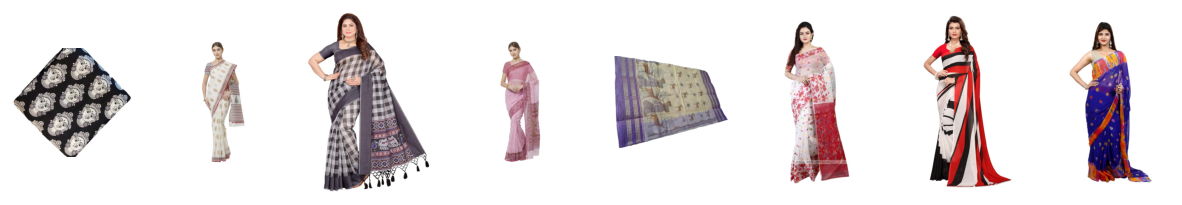

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Clean product names (removes unwanted characters)
def clean_product_name(name):
    import re
    return re.sub(r'[^A-Za-z0-9+\-*/=<>\s]', '', name)

# Load and clean the dataset
df = pd.read_json('cleaned_fashion_products_data.ldjson', lines=True)
df['product_name'] = df['product_name'].apply(clean_product_name)

# Tokenize product names into words
df['tokens'] = df['product_name'].apply(word_tokenize)

# Train Word2Vec model using the tokenized product names
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get the Word2Vec embedding of a product name
def get_product_embedding(tokens, model):
    # Get the embeddings of all words in the product name and average them
    embeddings = []
    for word in tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no valid word embeddings

# Apply function to get embeddings for all products
df['embedding'] = df['tokens'].apply(lambda x: get_product_embedding(x, model))

# Convert embeddings to a NumPy array
embeddings_matrix = np.vstack(df['embedding'].values)

# Function to recommend products based on a product's uniq_id using cosine similarity
def recommend_products_by_id(uniq_id, embeddings_matrix, num_recommendations=5):
    # Get the index of the product based on uniq_id
    if df[df['uniq_id'] == uniq_id].empty:
        print(f"Error: uniq_id '{uniq_id}' not found in the dataset.")
        return None
    else:
        product_index = df[df['uniq_id'] == uniq_id].index[0]

    # Calculate cosine similarity
    similarity = cosine_similarity(embeddings_matrix[product_index].reshape(1, -1), embeddings_matrix).flatten()

    # Get indices of products with highest cosine similarity (most similar)
    similar_indices = similarity.argsort()[-num_recommendations-1:-1][::-1]  # Exclude the product itself
    return df.iloc[similar_indices]

# Function to display product images
def display_images(image_urls):
    try:
        fig, axes = plt.subplots(1, len(image_urls), figsize=(15, 5))
        for i, url in enumerate(image_urls):
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")

# Example product_id (replace this with a valid uniq_id from your dataset)
product_uniq_id = df['uniq_id'].iloc[0]  # Gets the first available uniq_id from the dataset
num_recommendations = 8

# Get recommendations for the given uniq_id using Word2Vec and cosine similarity
word2vec_recommendations = recommend_products_by_id(product_uniq_id, embeddings_matrix, num_recommendations)

# Check if recommendations were found before printing and displaying images
if word2vec_recommendations is not None:
    print("Word2Vec Recommendations using Cosine Similarity:")
    print(word2vec_recommendations[['product_name', 'product_url']])
    display_images(word2vec_recommendations['large'].tolist())
